**Задание 1**
========
**Пункт 1**
-----------
*(50 баллов)* Необходимо написать функция nash_equilibrium(a), которая принимает матрицу выигрыша и возвращает значение игры и оптимальные стратегии первого и второго игроков.


In [119]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

def nash_equilibrium(in_matrix):
    a = np.matrix(in_matrix)
    n = len(a) #количесво строк
    m = len(a.T) #количесвто столбцов

    row_min = np.min(a, 1) 
    col_max = np.max(a.T, 1)

    # Проверка игры на равновесие Нэша.
    for i in range(0, n):
        for j in range(0, m):
            if (a[i, j] == row_min[i] and a[i, j] == col_max[j]):
                p = np.zeros(n)
                q = np.zeros(m)
                p[i] = 1
                q[j] = 1
                return {'f': a[i, j], 'p': p.tolist(), 'q': q.tolist()}

    # Делаем так, чтобы минимальный элемент матрицы был неотрицательным.
    sub = min(0, np.min(a))
    a -= sub
    
    # Формулировка ЗЛП.
    c = np.ones(n)
    a_ub = np.vstack((-a.T, -np.identity(n)))
    b_ub = np.hstack((np.full(m, -1), np.zeros(n)))

    # Поиск спектра стратегии первого игрока и значения игры.
    res = linprog(c, a_ub, b_ub)
    f = 1 / res.fun + sub
    p = res.x * (1/res.fun)
    

    # Формулировка ЗЛП.
    c = np.full(m, -1)
    a_ub = np.vstack((a, -np.identity(m)))
    b_ub = np.hstack((np.ones(n), np.zeros(m)))

    # Поиск спектра стратегии второго игрока.
    res = linprog(c, a_ub, b_ub)
    q = res.x * -1/res.fun
        
    return {'f': f, 'p': p.tolist(), 'q': q.tolist()}

**Пункт 2**
----------
*(50 баллов)* Проиллюстрировать работу вашего кода путем решения нескольких игр и визуализации спектров оптимальных стратегий игроков в Jupyter. В частности, нужно привести игры, в которых:

	● Cпектр оптимальной стратегии состоит из одной точки (т.е. существует равновесие Нэша в чистых стратегиях)
	● Cпектр оптимальной стратегии неполон (т.е. некоторые чистые стратегии не используются)
	● Cпектр оптимальной стратегии полон



In [120]:
from fractions import Fraction

 # Функция позволяющая "красиво" выводить стратегии игроков
def print_str(strategy):
    print('| ', end='')
    for i in range(len(strategy)):
        print(Fraction(strategy[i]).limit_denominator(), '| ', end='')
     
 # Функция рисующая графики стратегий игроков и выводящая ответ
def res_show(f,p,q):
    
    if (max(p)//1)==1 or (max(q)//1)==1:
        print('Nash equilibrium')
    elif min(p)==0.0 or min(q)==0.0:
        print('Spectrum is not full')
    else:
        print('Spectrum is full')
    
    print('f: ', f)
    print('p: ', end='')
    print_str(x['p'])
    print('')
    print('q: ', end='')
    print_str(x['q'])
    
    a1=[]
    for i in range(len(p)):
        a1.append(i+1)
#    fig = plt.figure()
    plt.scatter(a1 ,p ,color='r' ,s=90)
    plt.title('1-st player stratagy')
    plt.xlabel('Stratagies')
    plt.ylabel('Propabilities')
    plt.xlim(0,len(p)+1)
    plt.ylim(0,np.max(p)+1)
    plt.grid()
    plt.show()
    
    a2=[]
    for i in range(len(q)):
        a2.append(i+1)
#    fig = plt.figure()
    plt.scatter(a2,q,color='g' ,s=90)
    plt.title('2-nd player stratagy')
    plt.xlabel('Stratagies')
    plt.ylabel('Propabilities')
    plt.xlim(0,len(q)+1)
    plt.ylim(0,np.max(q)+1)
    plt.grid()
    plt.show()
    

*Тест 1*
--------
Cпектр оптимальной стратегии состоит из одной точки (т.е. существует равновесие Нэша в чистых стратегиях)

Nash equilibrium
f:  1
p: | 1 | 0 | 
q: | 0 | 1 | 

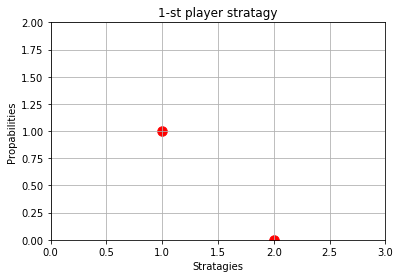

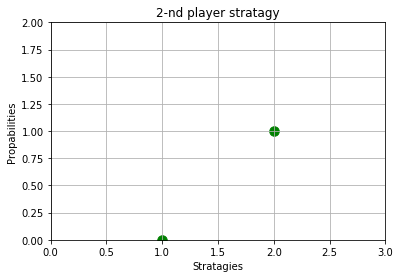

In [121]:
x = nash_equilibrium([[1, 1], [3, 1]])
res_show(x['f'],x['p'],x['q']) #эта функция визуализирует результаты, полученные при выполнеи nash_equilibrium

*Тест 2*
--------
Cпектр оптимальной стратегии полон

Spectrum is full
f:  2.5
p: | 1/4 | 3/4 | 
q: | 1/2 | 1/2 | 

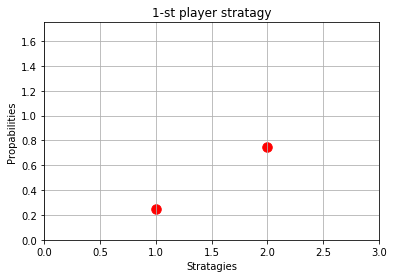

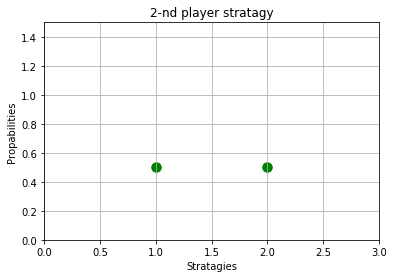

In [122]:
x = nash_equilibrium([[1, 4], [3, 2]])
res_show(x['f'],x['p'],x['q'])

*Тест 3*
--------
Cпектр оптимальной стратегии неполон (т.е. некоторые чистые стратегии не используются)

Spectrum is not full
f:  -0.0169491525424
p: | 43/118 | 0 | 28/59 | 19/118 | 
q: | 19/59 | 55/118 | 25/118 | 

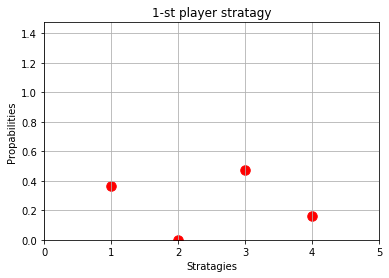

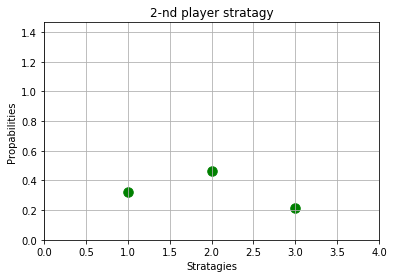

In [123]:
x=nash_equilibrium([[-4,0,6], [3,-8,-4], [1,2,-6], [6,-6,4]])
res_show(x['f'],x['p'],x['q'])

Пункт 4
====
*(20 баллов)* Написать unit-тесты для функции " nash_equilibrium ".

In [124]:
import unittest #библиотека для тестирования

#будем использовать класс для универсального тестирования
class TestNashEquilibrium(unittest.TestCase):
    def runTest(self): #подготовка прогона тестов
        pass
    
    #тест для равновесия по Нэшу
    def test_1(self): 
        x = nash_equilibrium([[1, 1], [3, 1]])
      #  self.assertAlmostEqual(v, 1)
    
        #сверяем списки те что пролучены и те что должны быть
        np.testing.assert_array_almost_equal([1, 0], x['p'])
        np.testing.assert_array_almost_equal([0, 1], x['q'])
        
    #тест для полного спектра    
    def test_2(self):
        x = nash_equilibrium([[1, 4], [3, 2]])
        np.testing.assert_array_almost_equal([0.25, 0.75], x['p'])
        np.testing.assert_array_almost_equal([0.5, 0.5], x['q'])
    
    #тест для неполного спектра
    def test_3(self):
        x = nash_equilibrium([[4,0,6], [3,8,4], [1,2,6], [6,6,4]])
        np.testing.assert_array_almost_equal([0.125, 0.1875, 0.6875], x['q'])
        np.testing.assert_array_almost_equal([0.3125, 0.25, 0.0, 0.4375], x['p']) 

        
tests = TestNashEquilibrium() # создаем объект класса
# подгружаем все тестовые случаи в suite
suite = unittest.TestLoader().loadTestsFromModule(tests) 
# запускаем
unittest.TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.012s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>